##  Melanoma Detection Assignment




**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Objective: Building a multiclass classification model using a custom CNN in TensorFlow

**Data Description**
The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion

Dataset link: https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/

## Project Pipeline

In [1]:
import tensorflow as tf
tf.__version__

'2.6.4'

In [2]:
## Importing Libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow.keras.preprocessing as pre

### 1. Data Reading/Data Understanding

In [5]:
'''

## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
drive_path = '/content/gdrive/My Drive/Machine Learning/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/'
## Defining Path Variable in goggle Colab
path_train = pathlib.Path(drive_path + "Train")
path_test = pathlib.Path(drive_path + "Test")
## Image Count
train_count = len(list(path_train.glob('*/*.jpg')))
print('Train Image Count', train_count)
test_count = len(list(path_test.glob('*/*.jpg')))
print('Test Image Count',test_count)

'''

'\n\n## If you are using the data by mounting the google drive, use the following :\nfrom google.colab import drive\ndrive.mount(\'/content/gdrive\')\ndrive_path = \'/content/gdrive/My Drive/Machine Learning/Melanoma Detection Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/\'\n## Defining Path Variable in goggle Colab\npath_train = pathlib.Path(drive_path + "Train")\npath_test = pathlib.Path(drive_path + "Test")\n## Image Count\ntrain_count = len(list(path_train.glob(\'*/*.jpg\')))\nprint(\'Train Image Count\', train_count)\ntest_count = len(list(path_test.glob(\'*/*.jpg\')))\nprint(\'Test Image Count\',test_count)\n\n'

#### **Copying Dataset from Input to Output directoy in kaggle**

In [6]:
from distutils.dir_util import copy_tree

fromd = '../input/melanoma-detection-dataset/Skin cancer ISIC The International Skin Imaging Collaboration/'
tod = '/kaggle/working'

copy_tree(fromd,tod)

['/kaggle/working/Test/pigmented benign keratosis/ISIC_0024371.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024358.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024337.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024382.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024420.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024409.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024336.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024422.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024408.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024381.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024412.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024324.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024383.jpg',
 '/kaggle/working/Test/pigmented benign keratosis/ISIC_0024426.jpg',
 '/kaggle/working/Test/pigmented b

In [7]:


## Defining Path Variable in kaggle
path_train = pathlib.Path("/kaggle/working/Train")
path_test = pathlib.Path("/kaggle/working/Test")
## Image Count
train_count = len(list(path_train.glob('*/*.jpg')))
print('Train Image Count', train_count)
test_count = len(list(path_test.glob('*/*.jpg')))
print('Test Image Count',test_count)



Train Image Count 2239
Test Image Count 118


### 2. Dataset creation

#### Creating the Dataset

In [9]:
batch_size = 32
img_height = 180
img_width = 180

#### Keeping 70/30 Train and Validation Dataset Ratio and using seed=123

In [10]:
## Writing Train dataset
train_ds = pre.image_dataset_from_directory(
    path_train,
    seed=123,
    validation_split= 0.3,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1568 files for training.


2022-11-22 07:25:01.033551: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 07:25:01.131666: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 07:25:01.132528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 07:25:01.135735: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
## Writing Validation dataset
val_ds = pre.image_dataset_from_directory(
    path_train,
    seed=123,
    validation_split= 0.3,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 671 files for validation.


In [12]:
## Writing Test dataset
test_ds = pre.image_dataset_from_directory(
    path_test,
    seed=123,
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


In [13]:
print("Train Dataset Class Names :\n",train_ds.class_names)

Train Dataset Class Names :
 ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [14]:
print("Train Dataset Class Names :\n",test_ds.class_names)

Train Dataset Class Names :
 ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### 3. Dataset visualisation

In [15]:
dataset_classes = train_ds.class_names
test_dataset_classes = test_ds.class_names

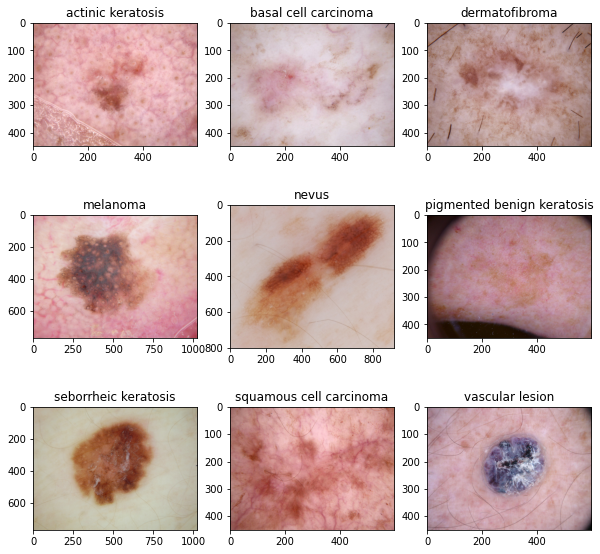

In [16]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(path_train.glob(dataset_classes[i]+'/*.jpg'))[1]))
  plt.title(dataset_classes[i])
  plt.imshow(image)

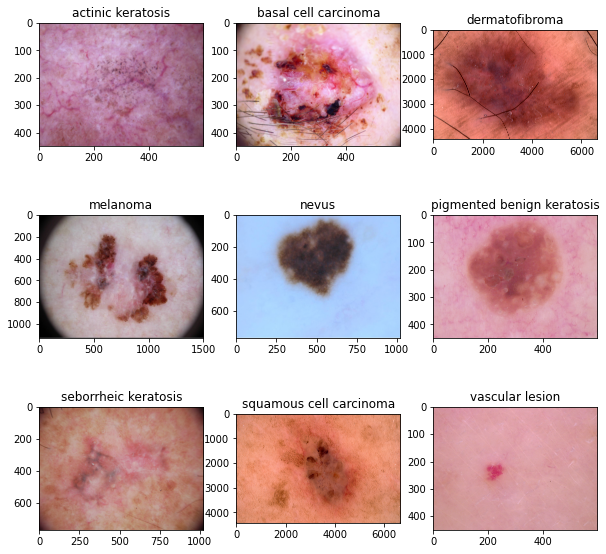

In [17]:
# test dataset visualization
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(path_test.glob(test_dataset_classes[i]+'/*.jpg'))[1]))
  plt.title(test_dataset_classes[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.



`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [18]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 4. Model Building & training

#### Model 1

In [19]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [20]:
## Model Defination
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [21]:
## Model Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
## View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        2

In [23]:
## Model Training
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2022-11-22 07:25:23.084574: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-22 07:25:32.271704: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


49/49 [==============================] - 23s 131ms/step - loss: 2.0636 - accuracy: 0.1875 - val_loss: 2.0232 - val_accuracy: 0.2131
Epoch 2/10
49/49 [==============================] - 2s 47ms/step - loss: 2.0336 - accuracy: 0.1971 - val_loss: 2.0880 - val_accuracy: 0.1833
Epoch 3/10
49/49 [==============================] - 2s 49ms/step - loss: 2.0398 - accuracy: 0.1926 - val_loss: 2.0280 - val_accuracy: 0.1684
Epoch 4/10
49/49 [==============================] - 2s 46ms/step - loss: 2.0176 - accuracy: 0.1996 - val_loss: 2.2173 - val_accuracy: 0.1878
Epoch 5/10
49/49 [==============================] - 2s 46ms/step - loss: 1.9748 - accuracy: 0.2188 - val_loss: 1.8727 - val_accuracy: 0.3621
Epoch 6/10
49/49 [==============================] - 2s 44ms/step - loss: 1.9309 - accuracy: 0.2710 - val_loss: 1.9296 - val_accuracy: 0.2757
Epoch 7/10
49/49 [==============================] - 2s 45ms/step - loss: 1.8621 - accuracy: 0.2902 - val_loss: 1.8529 - val_accuracy: 0.3189
Epoch 8/10
49/49 [====

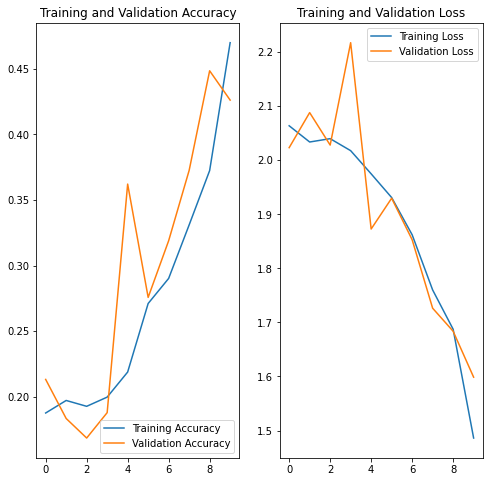

In [24]:
## Visualizing Training Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Since no pattern observed, increasing the number of epochs to 30 for observation**

In [25]:
## Model Training Epoch =20
epochs=20
history_epoch20 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
49/49 [==============================] - 2s 44ms/step - loss: 1.3951 - accuracy: 0.4994 - val_loss: 1.7087 - val_accuracy: 0.4486
Epoch 2/20
49/49 [==============================] - 2s 45ms/step - loss: 1.3457 - accuracy: 0.4987 - val_loss: 1.7082 - val_accuracy: 0.4158
Epoch 3/20
49/49 [==============================] - 2s 44ms/step - loss: 1.2929 - accuracy: 0.5312 - val_loss: 1.5647 - val_accuracy: 0.4665
Epoch 4/20
49/49 [==============================] - 2s 44ms/step - loss: 1.2050 - accuracy: 0.5587 - val_loss: 1.5940 - val_accuracy: 0.4933
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 1.2175 - accuracy: 0.5702 - val_loss: 1.5658 - val_accuracy: 0.4814
Epoch 6/20
49/49 [==============================] - 2s 45ms/step - loss: 1.2289 - accuracy: 0.5708 - val_loss: 1.5373 - val_accuracy: 0.4933
Epoch 7/20
49/49 [==============================] - 2s 44ms/step - loss: 1.1354 - accuracy: 0.5848 - val_loss: 1.5184 - val_accuracy: 0.5007
Epoch 8/20
49

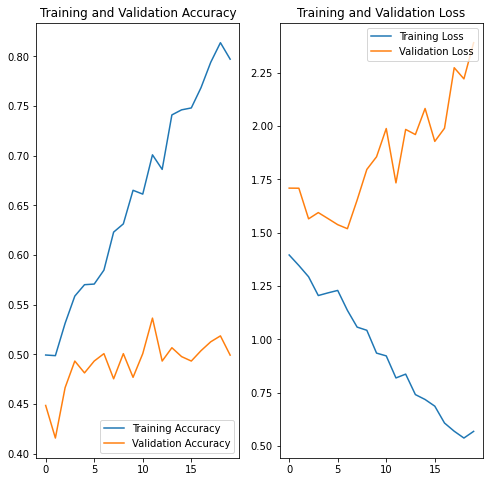

In [26]:
## Visualizing Training Results
acc = history_epoch20.history['accuracy']
val_acc = history_epoch20.history['val_accuracy']

loss = history_epoch20.history['loss']
val_loss = history_epoch20.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Intial Findings**
There is overfitting observed in the model as validation accuracy decreases while train accuracy increases around 17th epoch

In [28]:
## Test dataset Prediction and Accuracy
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  #y_pred=model.predict_classes(images)
  predict_x=model.predict(images)
  y_pred=np.argmax(predict_x,axis=1)
  # break
print(classification_report(y_true,y_pred,target_names=dataset_classes))
print("------"*20)
print("Accuracy on test dataset : ",(accuracy_score(y_true,y_pred)*100      )         )

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00         5
      basal cell carcinoma       0.60      0.50      0.55         6
            dermatofibroma       0.00      0.00      0.00         3
                  melanoma       0.00      0.00      0.00         6
                     nevus       0.00      0.00      0.00         3
pigmented benign keratosis       0.20      0.67      0.31         3
      seborrheic keratosis       0.00      0.00      0.00         2
   squamous cell carcinoma       0.50      0.33      0.40         3
           vascular lesion       1.00      1.00      1.00         1

                  accuracy                           0.22        32
                 macro avg       0.26      0.28      0.25        32
              weighted avg       0.21      0.22      0.20        32

-----------------------------------------------------------------------------------------------------------------

#### Using a RMSprop Optimizers

In [29]:
## Model Defination
num_classes = 9
model_rmsprop = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model_rmsprop.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model_rmsprop.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_rmsprop.add(MaxPool2D(pool_size=(2,2)))
model_rmsprop.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_rmsprop.add(MaxPool2D(pool_size=(2,2)))
model_rmsprop.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_rmsprop.add(MaxPool2D(pool_size=(2,2)))
model_rmsprop.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_rmsprop.add(MaxPool2D(pool_size=(2,2)))
model_rmsprop.add(Dropout(0.25))


model_rmsprop.add(Flatten())
model_rmsprop.add(Dense(num_classes, activation = "softmax"))


In [30]:
## Model Compile
model_rmsprop.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
## View the summary of all layers
model_rmsprop.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 180, 32)      2432      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 32)      25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 32)       

In [32]:
## Model Training
epochs=20
history_rmsprop = model_rmsprop.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
49/49 [==============================] - 3s 47ms/step - loss: 2.1839 - accuracy: 0.1977 - val_loss: 2.0726 - val_accuracy: 0.1803
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 2.0797 - accuracy: 0.2156 - val_loss: 2.3291 - val_accuracy: 0.1654
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 2.0520 - accuracy: 0.2226 - val_loss: 1.9681 - val_accuracy: 0.3115
Epoch 4/20
49/49 [==============================] - 2s 45ms/step - loss: 1.9781 - accuracy: 0.2570 - val_loss: 1.8912 - val_accuracy: 0.3189
Epoch 5/20
49/49 [==============================] - 2s 44ms/step - loss: 1.9555 - accuracy: 0.2672 - val_loss: 1.9286 - val_accuracy: 0.2429
Epoch 6/20
49/49 [==============================] - 2s 45ms/step - loss: 1.9291 - accuracy: 0.2972 - val_loss: 1.8669 - val_accuracy: 0.2489
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 1.9431 - accuracy: 0.3482 - val_loss: 1.7536 - val_accuracy: 0.3651
Epoch 8/20
49

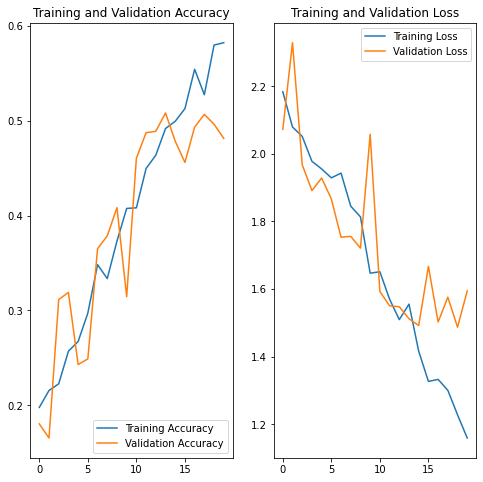

In [33]:
## Visualizing Training Results
acc = history_rmsprop.history['accuracy']
val_acc = history_rmsprop.history['val_accuracy']

loss = history_rmsprop.history['loss']
val_loss = history_rmsprop.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
## Test dataset Prediction and Accuracy
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  # print(model.predict_classes(images))
  # print(labels.numpy())
  y_true=list(labels.numpy())
  #y_pred=model_rmsprop.predict_classes(images)
  predict_x=model_rmsprop.predict(images)
  y_pred=np.argmax(predict_x,axis=1)
  # break
print(classification_report(y_true,y_pred,target_names=dataset_classes))
print("------"*20)
print("Accuracy on test dataset : ",(accuracy_score(y_true,y_pred)*100      )         )

                            precision    recall  f1-score   support

         actinic keratosis       1.00      0.20      0.33         5
      basal cell carcinoma       0.33      0.33      0.33         3
            dermatofibroma       1.00      0.33      0.50         3
                  melanoma       0.09      0.20      0.13         5
                     nevus       0.60      0.75      0.67         4
pigmented benign keratosis       0.20      0.25      0.22         4
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.00      0.00      0.00         4
           vascular lesion       0.67      0.67      0.67         3

                  accuracy                           0.31        32
                 macro avg       0.43      0.30      0.32        32
              weighted avg       0.46      0.31      0.32        32

-----------------------------------------------------------------------------------------------------------------

**Observation: No major improvement in Accuracy**

### 5. Data augmentation

In [35]:
data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

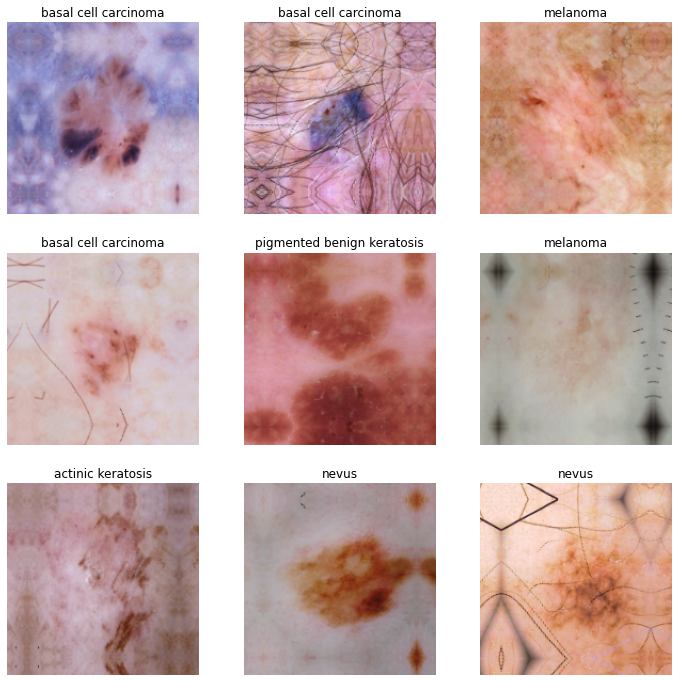

In [36]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_aug(images)[i].numpy().astype("uint8"))
        plt.title(dataset_classes[labels[i]])
        plt.axis("off")

### 6. Model Building & training on Augmented Data

#### Model 2

In [37]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D\

#### Model Building on Augmented Data using Adam Optimizer

In [38]:
 
num_classes = 9
model_aug_adam = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model_aug_adam.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model_aug_adam.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adam.add(MaxPool2D(pool_size=(2,2)))
model_aug_adam.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adam.add(MaxPool2D(pool_size=(2,2)))
model_aug_adam.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adam.add(MaxPool2D(pool_size=(2,2)))
model_aug_adam.add(Dropout(0.25))


model_aug_adam.add(Flatten())
model_aug_adam.add(Dense(num_classes, activation = "softmax"))

## Model 2 Compilation
model_aug_adam.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model 2 Training
epochs=30
history_aug_adam = model_aug_adam.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
49/49 [==============================] - 3s 49ms/step - loss: 2.0298 - accuracy: 0.2200 - val_loss: 1.9045 - val_accuracy: 0.2936
Epoch 2/30
49/49 [==============================] - 2s 48ms/step - loss: 1.8884 - accuracy: 0.2889 - val_loss: 1.8506 - val_accuracy: 0.3219
Epoch 3/30
49/49 [==============================] - 2s 47ms/step - loss: 1.7494 - accuracy: 0.3438 - val_loss: 1.6622 - val_accuracy: 0.3726
Epoch 4/30
49/49 [==============================] - 2s 46ms/step - loss: 1.6378 - accuracy: 0.3807 - val_loss: 1.6013 - val_accuracy: 0.4143
Epoch 5/30
49/49 [==============================] - 2s 46ms/step - loss: 1.6591 - accuracy: 0.4018 - val_loss: 1.6628 - val_accuracy: 0.4232
Epoch 6/30
49/49 [==============================] - 2s 47ms/step - loss: 1.5561 - accuracy: 0.4292 - val_loss: 1.6167 - val_accuracy: 0.4516
Epoch 7/30
49/49 [==============================] - 2s 48ms/step - loss: 1.5495 - accuracy: 0.4496 - val_loss: 1.6043 - val_accuracy: 0.4516
Epoch 8/30
49

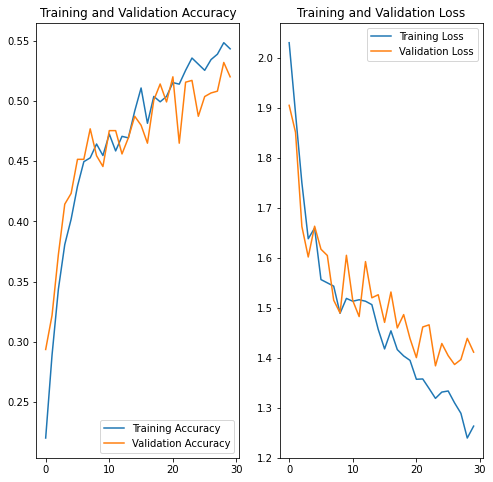

In [39]:
# Model 2 Visualizaiton
acc = history_aug_adam.history['accuracy']
val_acc = history_aug_adam.history['val_accuracy']

loss = history_aug_adam.history['loss']
val_loss = history_aug_adam.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Observation: Overfitting and loss both reduce in this model**

#### Model Building on Augmented Data using Stochastic gradient descent(SGD) Optimizer

In [40]:
 
num_classes = 9
model_aug_SGD = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model_aug_SGD.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model_aug_SGD.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_SGD.add(MaxPool2D(pool_size=(2,2)))
model_aug_SGD.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_SGD.add(MaxPool2D(pool_size=(2,2)))
model_aug_SGD.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_SGD.add(MaxPool2D(pool_size=(2,2)))
model_aug_SGD.add(Dropout(0.25))


model_aug_SGD.add(Flatten())
model_aug_SGD.add(Dense(num_classes, activation = "softmax"))

## Model Compilation
model_aug_SGD.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model 2 Training
epochs=30
history_aug_sgd = model_aug_SGD.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
49/49 [==============================] - 3s 49ms/step - loss: 2.0574 - accuracy: 0.1964 - val_loss: 2.0886 - val_accuracy: 0.1639
Epoch 2/30
49/49 [==============================] - 2s 46ms/step - loss: 2.0423 - accuracy: 0.2079 - val_loss: 2.0280 - val_accuracy: 0.1982
Epoch 3/30
49/49 [==============================] - 2s 46ms/step - loss: 2.0291 - accuracy: 0.2060 - val_loss: 2.0188 - val_accuracy: 0.2280
Epoch 4/30
49/49 [==============================] - 2s 48ms/step - loss: 2.0098 - accuracy: 0.2392 - val_loss: 2.0096 - val_accuracy: 0.2161
Epoch 5/30
49/49 [==============================] - 2s 47ms/step - loss: 1.9976 - accuracy: 0.2557 - val_loss: 1.9785 - val_accuracy: 0.3085
Epoch 6/30
49/49 [==============================] - 2s 47ms/step - loss: 1.9864 - accuracy: 0.2379 - val_loss: 1.9912 - val_accuracy: 0.1997
Epoch 7/30
49/49 [==============================] - 2s 47ms/step - loss: 1.9600 - accuracy: 0.2691 - val_loss: 1.8626 - val_accuracy: 0.3383
Epoch 8/30
49

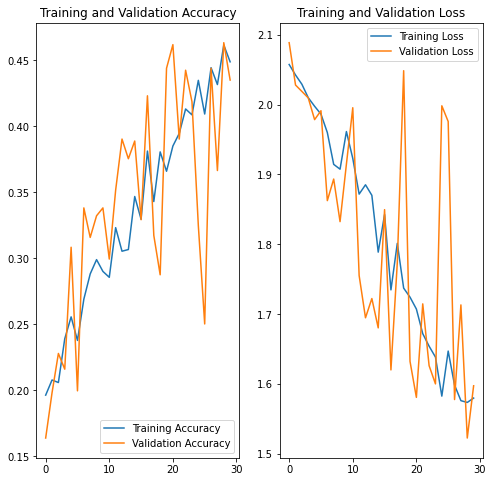

In [41]:
# Model 2 Visualizaiton
acc = history_aug_sgd.history['accuracy']
val_acc = history_aug_sgd.history['val_accuracy']

loss = history_aug_sgd.history['loss']
val_loss = history_aug_sgd.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Building on Augmented Data using Adagrad Optimizer

In [42]:
 
num_classes = 9
model_aug_adagrad = Sequential([ data_aug,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model_aug_adagrad.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model_aug_adagrad.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adagrad.add(MaxPool2D(pool_size=(2,2)))
model_aug_adagrad.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adagrad.add(MaxPool2D(pool_size=(2,2)))
model_aug_adagrad.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adagrad.add(MaxPool2D(pool_size=(2,2)))
model_aug_adagrad.add(Dropout(0.25))


model_aug_adagrad.add(Flatten())
model_aug_adagrad.add(Dense(num_classes, activation = "softmax"))

## Model Compilation
model_aug_adagrad.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model 2 Training
epochs=30
history_aug_adagrad = model_aug_adagrad.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
49/49 [==============================] - 3s 50ms/step - loss: 2.0864 - accuracy: 0.2009 - val_loss: 2.0280 - val_accuracy: 0.2057
Epoch 2/30
49/49 [==============================] - 2s 47ms/step - loss: 2.0302 - accuracy: 0.2060 - val_loss: 2.0290 - val_accuracy: 0.1908
Epoch 3/30
49/49 [==============================] - 2s 49ms/step - loss: 2.0291 - accuracy: 0.2073 - val_loss: 2.0291 - val_accuracy: 0.2370
Epoch 4/30
49/49 [==============================] - 2s 47ms/step - loss: 2.0231 - accuracy: 0.2015 - val_loss: 2.0204 - val_accuracy: 0.2191
Epoch 5/30
49/49 [==============================] - 2s 48ms/step - loss: 2.0215 - accuracy: 0.1869 - val_loss: 2.0189 - val_accuracy: 0.2370
Epoch 6/30
49/49 [==============================] - 2s 47ms/step - loss: 2.0195 - accuracy: 0.2136 - val_loss: 2.0133 - val_accuracy: 0.1967
Epoch 7/30
49/49 [==============================] - 2s 47ms/step - loss: 2.0159 - accuracy: 0.2060 - val_loss: 2.0126 - val_accuracy: 0.1833
Epoch 8/30
49

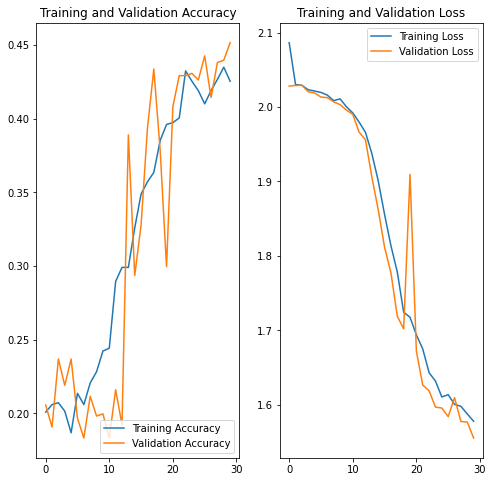

In [43]:
# Model 2 Visualizaiton
acc = history_aug_adagrad.history['accuracy']
val_acc = history_aug_adagrad.history['val_accuracy']

loss = history_aug_adagrad.history['loss']
val_loss = history_aug_adagrad.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Augmented Models Predication on Test Dataset

In [45]:
#checking the performance on the test set 
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  y_true=list(labels.numpy())
  #y_pred=model_aug_adam.predict_classes(images)
  predict_x=model_aug_adam.predict(images)
  y_pred=np.argmax(predict_x,axis=1)
    
  # break
  print("Adam optimizer")
  print(classification_report(y_true,y_pred,target_names=dataset_classes))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  

  print("*"*20)
  predict_x=model_aug_adagrad.predict(images)
  y_pred=np.argmax(predict_x,axis=1)
  #y_pred=model_aug_adagrad.predict_classes(images)
  # break
  print("Adagrad optimizer")
  print(classification_report(y_true,y_pred,target_names=dataset_classes))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  
    
  print("*"*20)
  predict_x=model_aug_SGD.predict(images)
  y_pred=np.argmax(predict_x,axis=1)
  #y_pred=model_aug_SGD.predict_classes(images)
  # break
  print("SGD optimizer")
  print(classification_report(y_true,y_pred,target_names=dataset_classes))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)

Adam optimizer
                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00         3
      basal cell carcinoma       0.60      0.75      0.67         8
            dermatofibroma       0.00      0.00      0.00         2
                  melanoma       0.25      0.25      0.25         4
                     nevus       0.57      1.00      0.73         4
pigmented benign keratosis       0.33      0.75      0.46         4
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.00      0.00      0.00         5
           vascular lesion       0.00      0.00      0.00         1

                  accuracy                           0.44        32
                 macro avg       0.19      0.31      0.23        32
              weighted avg       0.29      0.44      0.35        32

Accuracy on test dataset :  0.4375
********************
Adagrad optimizer
                        

**Findings** 
1. After addition of Agumentation layers we were able to reduce the model's overfitting. However in this case the model is not able to generalise well. 
2. We tried out different set of optmizers sgd , adagrad , adams which gave models that had low Training and Validation accuracy. 
3. The accuracy figures were less than 50% both for training and validation.
4. Maximum Accuracy on Test Dataset we were able to achive was 46%

### 7. Class distribution

In [46]:
path_list=[]
lesion_list=[]
for i in dataset_classes:
      
    for j in path_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis
1,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis
2,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis
3,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis
4,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis


In [47]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis
1,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis
2,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis
3,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis
4,/kaggle/working/Train/actinic keratosis/ISIC_0...,actinic keratosis


<BarContainer object of 9 artists>

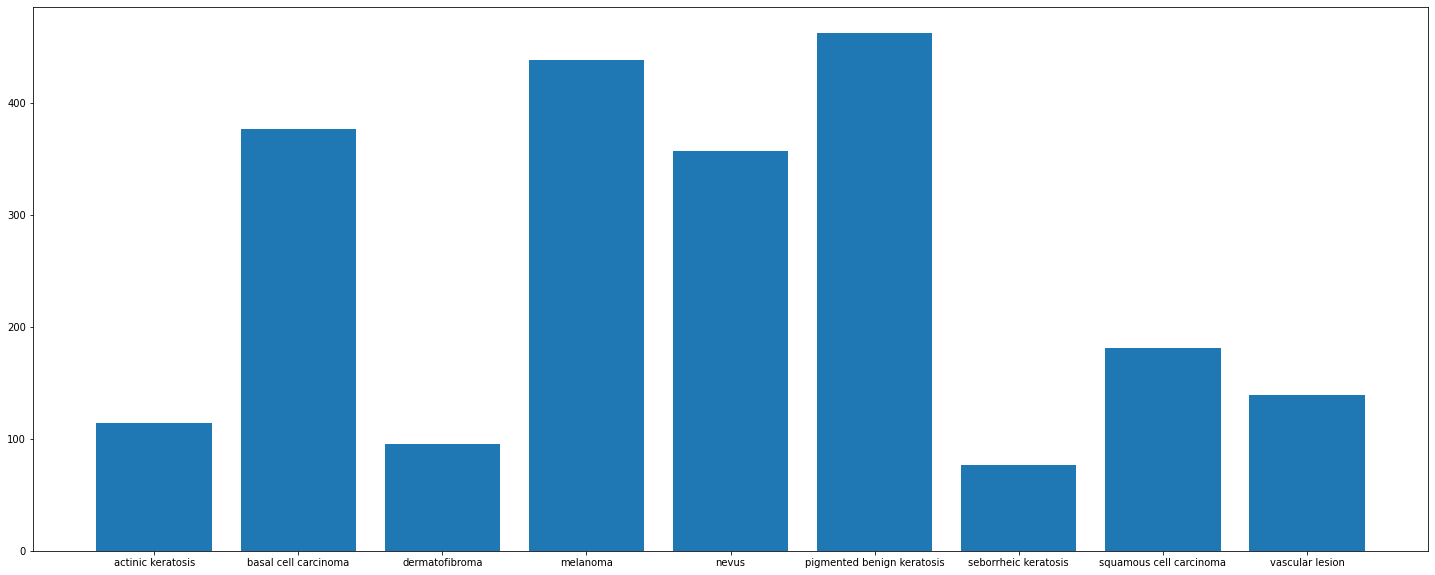

In [48]:
count=[]
for i in dataset_classes:
    count.append(len(list(path_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(dataset_classes,count)

In [49]:
dataset_classes

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### Observation
* Highest Distribution Class: pigmented benign keratosis
* Lowest Distribution Class: seborrheic keratosis

### 8. Handling class imbalances

In [50]:
!pip install Augmentor

In [51]:
import Augmentor

In [52]:
from glob import glob

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.

In [55]:
dataset_classes

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [56]:
for i in dataset_classes:
    p = Augmentor.Pipeline("/kaggle/working/Train/"+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FA3A028EF90>: 100%|██████████| 500/500 [00:16<00:00, 29.61 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3A05EF210>: 100%|██████████| 500/500 [00:15<00:00, 31.72 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3C02D1550>: 100%|██████████| 500/500 [00:16<00:00, 29.82 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA3A0252B10>: 100%|██████████| 500/500 [01:32<00:00,  5.43 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3A02525D0>: 100%|██████████| 500/500 [01:26<00:00,  5.77 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3C0300D50>: 100%|██████████| 500/500 [00:16<00:00, 30.74 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA3C01F7350>: 100%|██████████| 500/500 [00:38<00:00, 12.89 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3A060D790>: 100%|██████████| 500/500 [00:16<00:00, 30.69 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA3A060DB90>: 100%|██████████| 500/500 [00:16<00:00, 30.74 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [58]:
image_count_train = len(list(path_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### 9. Model Building & training on the rectified class imbalance data 

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Creating the Dataset after augmentation

In [74]:
batch_size = 32
img_height = 180
img_width = 180

#### Keeping 70/30 Train and Validation Dataset Ratio and using seed=123

In [75]:
## Writing Train dataset
train_ds_aug = pre.image_dataset_from_directory(
    path_train,
    seed=123,
    validation_split= 0.3,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 4718 files for training.


In [76]:
## Writing Validation dataset
val_ds_aug = pre.image_dataset_from_directory(
    path_train,
    seed=123,
    validation_split= 0.3,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 2021 files for validation.


#### Model Building & training on Augmented Data and Class Imblance handling

In [77]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D\

#### Model Building on Augmented Data using Adam Optimizer

In [78]:
num_classes = 9
model_aug_adam = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model_aug_adam.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model_aug_adam.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adam.add(MaxPool2D(pool_size=(2,2)))
model_aug_adam.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adam.add(MaxPool2D(pool_size=(2,2)))
model_aug_adam.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adam.add(MaxPool2D(pool_size=(2,2)))
model_aug_adam.add(Dropout(0.25))


model_aug_adam.add(Flatten())
model_aug_adam.add(Dense(num_classes, activation = "softmax"))

## Model 2 Compilation
model_aug_adam.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model 2 Training
epochs=20
history_aug_adam = model_aug_adam.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/20
148/148 [==============================] - 26s 165ms/step - loss: 2.1970 - accuracy: 0.1340 - val_loss: 2.1733 - val_accuracy: 0.1613
Epoch 2/20
148/148 [==============================] - 25s 159ms/step - loss: 2.1469 - accuracy: 0.1763 - val_loss: 2.1195 - val_accuracy: 0.1954
Epoch 3/20
148/148 [==============================] - 25s 162ms/step - loss: 1.9792 - accuracy: 0.2397 - val_loss: 1.8876 - val_accuracy: 0.2825
Epoch 4/20
148/148 [==============================] - 25s 163ms/step - loss: 1.8008 - accuracy: 0.3258 - val_loss: 1.6782 - val_accuracy: 0.3879
Epoch 5/20
148/148 [==============================] - 25s 162ms/step - loss: 1.4632 - accuracy: 0.4631 - val_loss: 1.5564 - val_accuracy: 0.4567
Epoch 6/20
148/148 [==============================] - 25s 161ms/step - loss: 1.2128 - accuracy: 0.5676 - val_loss: 1.4949 - val_accuracy: 0.5195
Epoch 7/20
148/148 [==============================] - 24s 158ms/step - loss: 0.9886 - accuracy: 0.6575 - val_loss: 1.6121 - val_ac

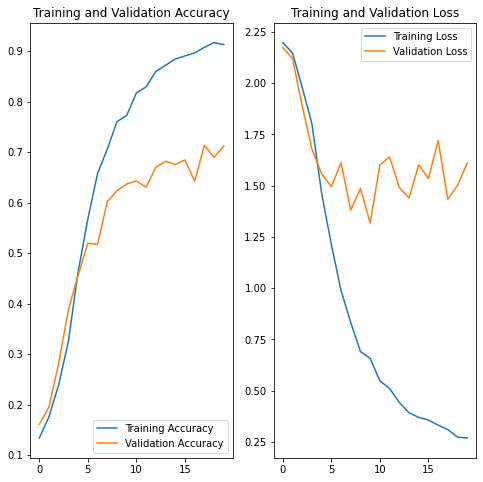

In [79]:
# Model 2 Visualizaiton
acc = history_aug_adam.history['accuracy']
val_acc = history_aug_adam.history['val_accuracy']

loss = history_aug_adam.history['loss']
val_loss = history_aug_adam.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Building on Augmented Data using Stochastic gradient descent(SGD) Optimizer

In [80]:
 
num_classes = 9
model_aug_SGD = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model_aug_SGD.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model_aug_SGD.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_SGD.add(MaxPool2D(pool_size=(2,2)))
model_aug_SGD.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_SGD.add(MaxPool2D(pool_size=(2,2)))
model_aug_SGD.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_SGD.add(MaxPool2D(pool_size=(2,2)))
model_aug_SGD.add(Dropout(0.25))


model_aug_SGD.add(Flatten())
model_aug_SGD.add(Dense(num_classes, activation = "softmax"))

## Model Compilation
model_aug_SGD.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model 2 Training
epochs=20
history_aug_sgd = model_aug_SGD.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/20
148/148 [==============================] - 25s 165ms/step - loss: 2.1820 - accuracy: 0.1405 - val_loss: 2.1772 - val_accuracy: 0.1856
Epoch 2/20
148/148 [==============================] - 25s 162ms/step - loss: 2.1579 - accuracy: 0.1689 - val_loss: 2.2395 - val_accuracy: 0.1232
Epoch 3/20
148/148 [==============================] - 24s 160ms/step - loss: 2.1435 - accuracy: 0.1850 - val_loss: 2.1378 - val_accuracy: 0.1816
Epoch 4/20
148/148 [==============================] - 24s 160ms/step - loss: 2.0795 - accuracy: 0.2113 - val_loss: 2.0482 - val_accuracy: 0.1836
Epoch 5/20
148/148 [==============================] - 24s 157ms/step - loss: 1.9722 - accuracy: 0.2454 - val_loss: 1.8765 - val_accuracy: 0.3107
Epoch 6/20
148/148 [==============================] - 25s 162ms/step - loss: 1.9077 - accuracy: 0.2885 - val_loss: 1.8787 - val_accuracy: 0.3058
Epoch 7/20
148/148 [==============================] - 25s 161ms/step - loss: 1.8497 - accuracy: 0.3088 - val_loss: 1.7552 - val_ac

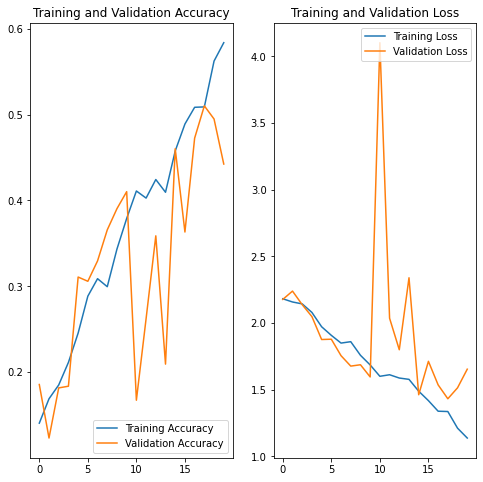

In [81]:
# Model 2 Visualizaiton
acc = history_aug_sgd.history['accuracy']
val_acc = history_aug_sgd.history['val_accuracy']

loss = history_aug_sgd.history['loss']
val_loss = history_aug_sgd.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model Building on Augmented Data using Adagrad Optimizer

In [82]:
 
num_classes = 9
model_aug_adagrad = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model_aug_adagrad.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model_aug_adagrad.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adagrad.add(MaxPool2D(pool_size=(2,2)))
model_aug_adagrad.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adagrad.add(MaxPool2D(pool_size=(2,2)))
model_aug_adagrad.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_aug_adagrad.add(MaxPool2D(pool_size=(2,2)))
model_aug_adagrad.add(Dropout(0.25))


model_aug_adagrad.add(Flatten())
model_aug_adagrad.add(Dense(num_classes, activation = "softmax"))

## Model Compilation
model_aug_adagrad.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model 2 Training
epochs=20
history_aug_adagrad = model_aug_adagrad.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/20
148/148 [==============================] - 26s 165ms/step - loss: 2.1842 - accuracy: 0.1344 - val_loss: 2.1841 - val_accuracy: 0.1465
Epoch 2/20
148/148 [==============================] - 25s 164ms/step - loss: 2.1774 - accuracy: 0.1443 - val_loss: 2.1767 - val_accuracy: 0.1806
Epoch 3/20
148/148 [==============================] - 25s 167ms/step - loss: 2.1694 - accuracy: 0.1594 - val_loss: 2.1653 - val_accuracy: 0.1994
Epoch 4/20
148/148 [==============================] - 25s 160ms/step - loss: 2.1423 - accuracy: 0.1942 - val_loss: 2.1133 - val_accuracy: 0.2286
Epoch 5/20
148/148 [==============================] - 24s 159ms/step - loss: 2.0264 - accuracy: 0.2395 - val_loss: 1.8831 - val_accuracy: 0.2895
Epoch 6/20
148/148 [==============================] - 24s 160ms/step - loss: 1.8531 - accuracy: 0.3086 - val_loss: 1.7552 - val_accuracy: 0.3691
Epoch 7/20
148/148 [==============================] - 25s 163ms/step - loss: 1.7755 - accuracy: 0.3258 - val_loss: 1.7095 - val_ac

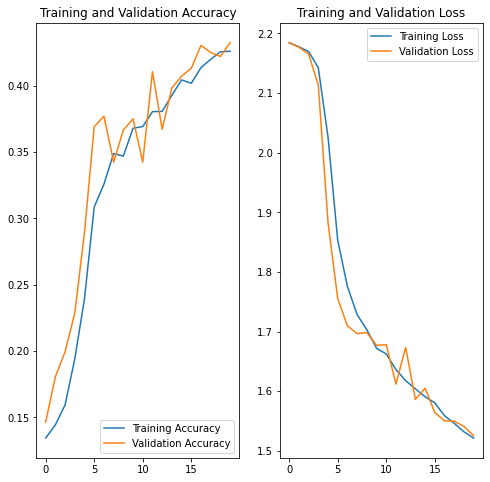

In [83]:
# Model 2 Visualizaiton
acc = history_aug_adagrad.history['accuracy']
val_acc = history_aug_adagrad.history['val_accuracy']

loss = history_aug_adagrad.history['loss']
val_loss = history_aug_adagrad.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Augmented Models Predication on Test Dataset

In [85]:
#checking the performance on the test set 
y_true=[]
y_pred=[]
for images, labels in test_ds.take(1):
  y_true=list(labels.numpy())
  #y_pred=model_aug_adam.predict_classes(images)
  predict_x=model_aug_adam.predict(images)
  y_pred=np.argmax(predict_x,axis=1)
  # break
  print("Adam optimizer")
  print(classification_report(y_true,y_pred,target_names=dataset_classes))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  

  print("*"*20)
  #y_pred=model_aug_adagrad.predict_classes(images)
  predict_x=model_aug_adagrad.predict(images)
  y_pred=np.argmax(predict_x,axis=1)
  # break
  print("Adagrad optimizer")
  print(classification_report(y_true,y_pred,target_names=dataset_classes))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  
    
  print("*"*20)
  #y_pred=model_aug_SGD.predict_classes(images)
  predict_x=model_aug_SGD.predict(images)
  y_pred=np.argmax(predict_x,axis=1)
  # break
  print("SGD optimizer")
  print(classification_report(y_true,y_pred,target_names=dataset_classes))
  print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
  print("*"*20)

Adam optimizer
                            precision    recall  f1-score   support

         actinic keratosis       1.00      0.50      0.67         2
      basal cell carcinoma       0.29      0.50      0.36         4
            dermatofibroma       0.67      0.29      0.40         7
                  melanoma       0.00      0.00      0.00         6
                     nevus       0.29      0.50      0.36         4
pigmented benign keratosis       0.22      1.00      0.36         2
      seborrheic keratosis       0.00      0.00      0.00         1
   squamous cell carcinoma       0.50      0.20      0.29         5
           vascular lesion       1.00      1.00      1.00         1

                  accuracy                           0.34        32
                 macro avg       0.44      0.44      0.38        32
              weighted avg       0.40      0.34      0.32        32

Accuracy on test dataset :  0.34375
********************
Adagrad optimizer
                       

#### Conculsion

1. Adding augmented images helped in handling class imblance.
2. Model trained accuracy increased to above 70% and validation above 65%
3. Till first 15 epocs learning rate is very high then validation accuracy decreases while train accuracy still increases for some epochs
